In [1]:
import numpy as np
import pandas as pd
from set_visualization import *

matplotlib imported
pyplot imported
seaborn imported
sns.set
sns.set_style(whitegrid)
sns.set_color_codes()
type (% matplotlib inline) if necessary
type (% config InlineBackend.figure_formats = {‘png’, ‘retina’}) if necessary


In [2]:
% matplotlib inline

In [2]:
weather_2 = pd.read_csv('../../data/weather.csv', index_col=['station_nbr'])

In [3]:
print(weather_2.shape)
weather_2.loc[5].head()    # all missing data

(20517, 19)


,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
station_nbr,,,,,,,,,,,,,,,,,,,
5,2012-06-01,M,M,M,M,M,M,M,M,0411,1913,,M,M,M,M,M,M,M
5,2012-06-02,M,M,M,M,M,M,M,M,0411,1914,,M,M,M,M,M,M,M
5,2012-06-03,M,M,M,M,M,M,M,M,0410,1915,,M,M,M,M,M,M,M
5,2012-06-04,M,M,M,M,M,M,M,M,0410,1915,,M,M,M,M,M,M,M
5,2012-06-05,M,M,M,M,M,M,M,M,0409,1916,,M,M,M,M,M,M,M


In [5]:
# drop station_5
weather_2 = weather_2.drop(5)
print(weather_2.shape)
weather_2.head()

(19665, 19)


,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
station_nbr,,,,,,,,,,,,,,,,,,,
1,2012-01-01,52,31,42,M,36,40,23,0,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
2,2012-01-01,48,33,41,16,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
3,2012-01-01,55,34,45,9,24,36,20,0,0735,1720,,0.0,0.00,29.77,30.47,9.9,31,10.0
4,2012-01-01,63,47,55,4,28,43,10,0,0728,1742,,0.0,0.00,29.79,30.48,8.0,35,8.2
6,2012-01-01,63,34,49,0,31,43,16,0,0727,1742,,0.0,0.00,29.95,30.47,14.0,36,13.8


# replace missing value with np.nan

In [6]:
for i in weather_2.columns:
    print(i, "\n", weather_2[i].unique())

date 
 ['2012-01-01' '2012-01-02' '2012-01-03' ..., '2014-10-29' '2014-10-30'
 '2014-10-31']
tmax 
 ['52' '48' '55' '63' '50' '66' '34' '73' '72' '38' '56' '59' '46' '45' '60'
 '44' '21' '65' '43' '53' '25' '32' '28' '62' '61' '47' '30' '26' '71' '58'
 '39' '54' '23' '27' '31' '68' '70' '67' '36' '69' '74' '75' '33' '51' '57'
 '41' '49' '76' '35' '77' '64' '40' '16' '37' '42' '14' '22' '13' '10' '20'
 '24' '80' '4' '11' '78' '17' '18' '79' '29' '81' '82' '83' '88' '87' '92'
 '89' '84' '85' '86' '90' '91' '94' '93' '96' '95' 'M' '97' '98' '101' '99'
 '100' '105' '103' '102' '106' '104' '109' '107' '108' '110' '111' '112'
 '114' '113' '19' '15' '12' '-1' '5' '8' '9' '1' '6' '2' '3' '7' '-2' '-11'
 '-4' '-6' '0']
tmin 
 ['31' '33' '34' '47' '45' '19' '53' '48' '18' '26' '30' '38' '40' '25' '41'
 '28' '24' '37' '36' '11' '16' '29' '22' '35' '15' '9' '21' '27' '10' '5'
 '32' '20' '3' '8' '44' '46' '17' '55' '43' '57' '50' '49' '54' '42' '39'
 '52' '23' '56' '14' '59' '-1' '12' '6' '4' '2' '

In [7]:
def codesum_character(codesum):
    if codesum == ' ':
        return "moderate"
    else:
        return codesum

In [8]:
weather_2['codesum'] = weather_2['codesum'].apply(codesum_character)

In [9]:
def compare_codesum(codesum):
    if codesum =="moderate":
        return codesum
    else:
        return "abnormal"

In [10]:
weather_2['codsum_Y/N'] = weather_2['codesum'].apply(compare_codesum)

In [11]:
for i in weather_2.columns:
    weather_2[i] = weather_2[i].replace('-', np.nan)
    weather_2[i] = weather_2[i].replace(' ', np.nan)
    weather_2[i] = weather_2[i].replace('M', np.nan)
    weather_2[i] = weather_2[i].replace('T', np.nan)
    weather_2[i] = weather_2[i].replace('  T', np.nan)

In [12]:
for i in weather_2.columns:
    print(i, "\n", weather_2[i].unique())

date 
 ['2012-01-01' '2012-01-02' '2012-01-03' ..., '2014-10-29' '2014-10-30'
 '2014-10-31']
tmax 
 ['52' '48' '55' '63' '50' '66' '34' '73' '72' '38' '56' '59' '46' '45' '60'
 '44' '21' '65' '43' '53' '25' '32' '28' '62' '61' '47' '30' '26' '71' '58'
 '39' '54' '23' '27' '31' '68' '70' '67' '36' '69' '74' '75' '33' '51' '57'
 '41' '49' '76' '35' '77' '64' '40' '16' '37' '42' '14' '22' '13' '10' '20'
 '24' '80' '4' '11' '78' '17' '18' '79' '29' '81' '82' '83' '88' '87' '92'
 '89' '84' '85' '86' '90' '91' '94' '93' '96' '95' nan '97' '98' '101' '99'
 '100' '105' '103' '102' '106' '104' '109' '107' '108' '110' '111' '112'
 '114' '113' '19' '15' '12' '-1' '5' '8' '9' '1' '6' '2' '3' '7' '-2' '-11'
 '-4' '-6' '0']
tmin 
 ['31' '33' '34' '47' '45' '19' '53' '48' '18' '26' '30' '38' '40' '25' '41'
 '28' '24' '37' '36' '11' '16' '29' '22' '35' '15' '9' '21' '27' '10' '5'
 '32' '20' '3' '8' '44' '46' '17' '55' '43' '57' '50' '49' '54' '42' '39'
 '52' '23' '56' '14' '59' '-1' '12' '6' '4' '2' '

# Data conversion to float

In [13]:
weather_2.columns

Index(['date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat',
       'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'codsum_Y/N'],
      dtype='object')

In [14]:
for col in weather_2[['tmax','tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 
                 'sunrise', 'sunset', 'snowfall', 'preciptotal', 'stnpressure','sealevel',
                 'resultspeed', 'resultdir', 'avgspeed']]:
    weather_2[col] = weather_2[col].astype(np.float64)

In [15]:
weather_2 = pd.DataFrame(weather_2, columns=['date','tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat',
       'cool', 'sunrise', 'sunset', 'codesum','codsum_Y/N', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed'])

In [16]:
print(len(weather_2))

for i in weather_2.columns:
    sum = weather_2[i].isnull().sum()
    print(i, "- null count :", sum, "(",(sum / 20517 * 100).round(2),"%",")")

19665
date - null count : 0 ( 0.0 % )
tmax - null count : 84 ( 0.41 % )
tmin - null count : 86 ( 0.42 % )
tavg - null count : 647 ( 3.15 % )
depart - null count : 10689 ( 52.1 % )
dewpoint - null count : 220 ( 1.07 % )
wetbulb - null count : 400 ( 1.95 % )
heat - null count : 647 ( 3.15 % )
cool - null count : 647 ( 3.15 % )
sunrise - null count : 9625 ( 46.91 % )
sunset - null count : 9625 ( 46.91 % )
codesum - null count : 0 ( 0.0 % )
codsum_Y/N - null count : 0 ( 0.0 % )
snowfall - null count : 6713 ( 32.72 % )
preciptotal - null count : 2448 ( 11.93 % )
stnpressure - null count : 77 ( 0.38 % )
sealevel - null count : 1277 ( 6.22 % )
resultspeed - null count : 143 ( 0.7 % )
resultdir - null count : 143 ( 0.7 % )
avgspeed - null count : 53 ( 0.26 % )


In [ ]:
def graph_missing(weather_2):
    fig = plt.figure()
    for i in range(1, 20+1):
        plt.subplot(10, 2, i)
        missing_data_count = data_train.isnull().sum()
        missing_data_count.sort_values(ascending = False, inplace = True)
        missing_data_count_filtered = missing_data_count[missing_data_count > 0]
        missing_data_count_filtered.plot(kind = 'bar', title = 'missing data count')
    plt.show()

In [32]:
weather_2
missing_data_count = weather_2.loc[1]['tmax'].isnull().sum()
print(missing_data_count)
missing_data_count_filtered = missing_data_count[missing_data_count > 0]
missing_data_count_filtered

2


array([2])

<Container object of 20 artists>

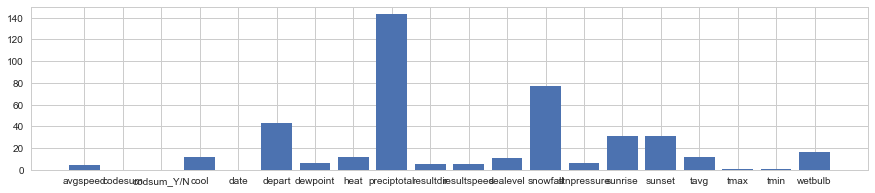

In [112]:
i =2
dic = {}
for j in weather_2.columns:
    sum = weather_2.loc[i][j].isnull().sum()
    dic[j] = sum
columns = list(dic.keys())
counts = list(dic.values())
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
# fig = plt.figure(size=(4, 2))
plt.bar(columns, counts )



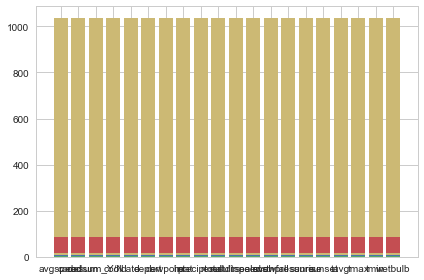

In [99]:
# f, ax = plt.subplots(1, 1)
    
# fig = plt.figure(figsize=(40, 30))


for i in (1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20):
    for j in weather_2.columns:
        dic = {}
        labels = []
        labels.append(j)
        sum = weather_2.loc[i][j].isnull().sum()
        dic[j] = sum
        counts = list(dic.values())
#         plt.xticks(columns, labels)
        plt.bar(columns, counts, )


plt.tight_layout()
plt.show()

TypeError: Argument 'obj' has incorrect type (expected list, got DataFrame)

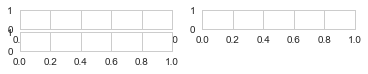

In [22]:
plt.subplot(10, 2, 1)
plt.plot(x1, y1, kind='bar', )
plt.subplot(10, 2, 2)
plt.subplot(10, 2, 3)
plt.show()

In [26]:
print("station_1")
for i in weather_2.columns:
    sum = weather_2.loc[1][i].isnull().sum()
    print(i, "- null count :", sum, "(",(sum / 20517 * 100).round(2),"%",")")

station_1
date - null count : 0 ( 0.0 % )
tmax - null count : 2 ( 0.01 % )
tmin - null count : 2 ( 0.01 % )
tavg - null count : 6 ( 0.03 % )
depart - null count : 1035 ( 5.04 % )
dewpoint - null count : 6 ( 0.03 % )
wetbulb - null count : 11 ( 0.05 % )
heat - null count : 6 ( 0.03 % )
cool - null count : 6 ( 0.03 % )
sunrise - null count : 1035 ( 5.04 % )
sunset - null count : 1035 ( 5.04 % )
codesum - null count : 0 ( 0.0 % )
codsum_Y/N - null count : 0 ( 0.0 % )
snowfall - null count : 1035 ( 5.04 % )
preciptotal - null count : 202 ( 0.98 % )
stnpressure - null count : 4 ( 0.02 % )
sealevel - null count : 8 ( 0.04 % )
resultspeed - null count : 4 ( 0.02 % )
resultdir - null count : 4 ( 0.02 % )
avgspeed - null count : 3 ( 0.01 % )


* * * *

## Missing Data에 대한 생각



1번 유형 - 바로 이전 날의 데이터를 참조
- tmax
- tmin
- tavg
- dewpoint
- wetbulb
- heat
- cool
- snowfall
- preciptotal
- stnpressure
- sealevel
- resultspeed
- reusltdir
- avgspeed

2번 유형 - null값의 비율이 지나치게 높다
- depart
- sunrise
- sunset
    - (1) 전날 데이터 참조
    - (2) 평균치

1번 유형을 위한 `2012-01-01` missing data 처리 방법
- `tavg` = (`tmax` + `tmin` / 2)
- `heat` =  ??
- `cool` = 0.0
- `snowfall` , `preciptotal` = 0.0
- `sealevel` = average


(+)
- station 5가 없는 이유는?
- station 5는 2012년 6월 1일부터 등장. 모두 null값. 
- 이건 뭐지?
- 애초에 제외?


## 각 station의 첫번 째 값 확인 

##### (제일 첫 값의 null일 때는 참조를 할 과거의 값이 없으므로)

In [ ]:
weather.loc['2012-01-03']

In [ ]:
weather_2.loc[9]

In [ ]:
weather_

# fill null data

In [ ]:
weather2 = weather
print(weather2.columns)
weather2.head()

### 1번 유형

In [ ]:
def isnan(columns):
    for i in range(len(columns)):
        if np.isnan(columns[i]) == True:
            columns[i] = 0.0
        elif np.isnan(i) == False:
            pass
    return columns

In [ ]:
snowfall = isnan(list(weather2['snowfall']))
weather2['snowfall'] = snowfall

In [ ]:
preciptotal = isnan(list(weather2['preciptotal']))
weather2['preciptotal'] = preciptotal

In [ ]:
print(weather2['snowfall'].isnull().sum()) 
print(weather2['preciptotal'].isnull().sum())

## 2번 유형

In [ ]:
weather2 = weather2.sort_values(['station_nbr', 'date']).reset_index(drop=True)

In [ ]:
weather2

In [ ]:
def replace(columns):
    columns = list(columns)
    for i in range(len(columns)):
        if np.isnan(columns[i]) == True:
            columns[i] = columns[i-1]
    return columns

def replace_all():
    for col in weather2[['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat',
       'cool', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed']]:
        weather2[col] = replace(weather2[col])

In [ ]:
replace_all()

In [ ]:
print(weather2['tmin'].isnull().sum()) 

In [ ]:
weather2 = weather2.set_index(['station_nbr'])

In [ ]:
weather2.head()

In [ ]:
weather2.to_csv('../data/weather_ver2')

In [ ]:
weather = pd.read_csv('../data/weather_ver2', index_col=0)

In [ ]:
weather

# Merge

In [ ]:
data.head()

In [ ]:
weather2.head()

In [ ]:
data.merge(weather2, left_on='date', right_on='date', how = 'outer')

In [ ]:
data

# Identify Outlier (units over 1000)

### 평일, 휴일, 특이 날씨 사항, 발견 되지 않았습니다. outlier로 판단.

In [ ]:
# data = data[data['units']>0].reset_index(drop=True)

In [ ]:
outlier_1 = data[data['units']>1000]

In [ ]:
outlier_1

In [ ]:
data.drop(2503831, inplace = True)
data.drop(2700301, inplace = True)

In [ ]:
data[data['units']>1000]

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
data.head()